In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Neural Network

In [30]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

# df = pd.read_csv("classification_circle.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [31]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [32]:
%matplotlib notebook
%matplotlib notebook

def animate_nn(i, *fargs):
    clf, X, y, df, xx, yy = fargs
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
    )
    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.legend(loc='lower right')


<IPython.core.display.Javascript object>


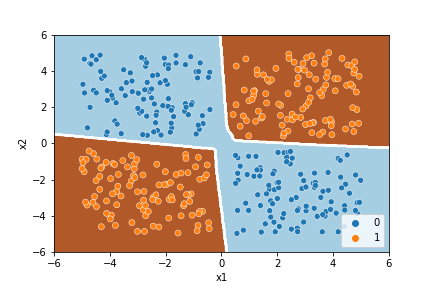

In [37]:
clf = MLPClassifier(activation="relu", solver='adam', alpha=0.03, hidden_layer_sizes=(8, 4),
                    random_state=42, max_iter=2, warm_start=True)
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
anim = FuncAnimation(plt.gcf(), func=animate_nn, fargs=(clf, X, y, df, xx, yy), interval=100, frames=200)
plt.show()

# Logistic Regression

In [23]:
# df = pd.read_csv("classification_linear_uniform.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

,x1,x2,y
0,2.415993,4.922784,1
1,4.489238,3.196620,1
2,4.935055,3.699012,1
3,1.589000,2.737612,1
4,2.112737,1.538858,1


In [24]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [25]:
%matplotlib notebook
%matplotlib notebook

def animate_lr(i, *fargs):
    clf, X, y, df = fargs
    clf.fit(X, y)
    
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    theta = -w1/w2

    xmin, xmax = -6, 6
    ymin, ymax = -6, 6
    xd = np.array([xmin, xmax])
    yd = theta*xd + b
    
    plt.cla()
    plt.plot(xd, yd, 'w', lw=3)
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


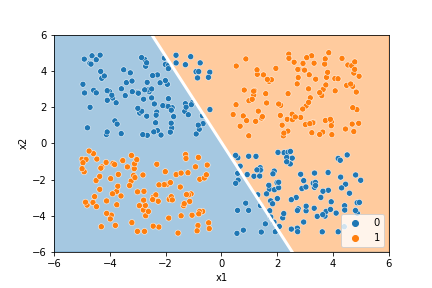

In [29]:
clf = LogisticRegression(max_iter=1, warm_start=True)
anim = FuncAnimation(plt.gcf(), func=animate_lr, fargs=(clf, X, y, df), interval=200, frames=300)
plt.show()